# **SOLLDA1 MCO: IBM HR Analytics Employee Attrition & Performance**

## **I. Objective** 
### Clearly state the objective of the analysis, what problem or question the group aims to address with the data. 

This analysis aims to understand the key factors influencing employee attrition and career growth within IBM. By examining attributes such as job role, performance rating, years at the company, work-life balance, and employee satisfaction, the group can identify patterns that contribute to voluntary and involuntary departures. In addition, the study will help in recognizing high-potential employees suitable for promotion by leveraging data on job involvement, training opportunities, and post career progression. Through this approach, the group seeks to enhance employee retention strategies and optimize internal talent management. 

## **II. Problem Statement** 
### Explain the problem or question the analysis seeks to solve or explore. A clear and concise statement of the challenge and the significance is needed. 

## **III. Background** 
### Provide context about the data and the problem domain. Explain where data came from, including its source, collection methds, and any relevant information about its reliability and completeness. 

## **IV. Data Source**
### Describe the origin of the data, whether it was collected internally or obtained from external sources. Include details such as data provider, data format, and the time period covered by the data. 

## **V. Data Description** 
### Provide a brief overview of the data's structure and contents. Mention the key variables and their meanings. Include any preprocessing steps performed, such as data cleaning, and/or feature engineering.

Import necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno 

Load the dataset

In [2]:
df = pd.read_csv(r'C:\Users\arche\OneDrive\Documents\DLSU\3rd Year\2nd Term\SOLLDA1\SOLLDA1_MCO\IBM-HR-Employee-Attrition.csv') 
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Display column names and data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The dataset consists of 35 columns that capture different aspects of employees' professional background, work conditions, and job satisfaction. Below is an explanation of each variable: 

#### **1. Employee Demographics** 
- **Age** (*int*) - The age of the employee. 

- **Gender** (*object*) - The gender of the employee (e.g., Male, Female). 

- **MaritalStatus** (*object*) - The marital status of the employee (e.g., Single, Married, Divorced). 

- **Education** (*int*) - Level of education on a scale (1 to 5) where: 
    - 1 = Below College 
    - 2 = College 
    - 3 = Bachelor 
    - 4 = Master 
    - 5 = Doctorate 
    
- **EducationField** (*object*) - The field of education (e.g., Life Sciences, Marketing, Technical Degree).

#### **2. Job and Work Details** 
- **JobRole** (*object*) - The specific job title of the employee (e.g., Sales Executive, Research Scientist). 

- **Department** (*object*) - The department in which the employee works (e.g., Sales, Research & Development, Human Resources). 

- **JobLevel** (*int*) - The hierarchichal level of the job within the organization (e.g., 1 = Entry Level, 5 = Senior Management). 

- **JobInvolvement** (*int*) - Level of employee involvement in the job.  
    - 1 = Low 
    - 2 = Medium 
    - 3 = High 
    - 4 = Very High 

- **JobSatisfaction** (*int*) - Employee satisfaction with the job. 
    - 1 = Low 
    - 2 = Medium 
    - 3 = High 
    - 4 = Very High 

- **WorkLifeBalance** (*int*) - Employee's perception of work-life balance. 
    - 1 = Bad 
    - 2 = Good 
    - 3 = Better 
    - 4 = Best

- **OverTime** (*object*) - Indicates whether the employee works overtime (Yes/No). 

- **StandardHours** (*int*) - Standard working hours for employees (appears to be a constant value). 

#### **3. Compensation and Benefits** 
- **HourlyRate** (*int*) - The hourly wage of the employee. 

- **DailyRate** (*int*) - The daily pay rate of the employee. 

- **Monthly Income** (*int*) - The total monthly earnings of the employee. 

- **StockOptionLevel** (*int*) - Stock option level granted to the employee (0 = No stock options, 3 = High stock options). 

- **PercentageSalaryHike** (*int*) - Percentage increase in salary after the last performance review. 

#### **4. Employment History and Tenure** 
- **YearsAtCompany** (*int*) - The number of years the employee has been with the company. 

- **YearsInCurrentRole** (*int*) - The number of years the employee has been in their current role. 

- **YearsSinceLastPromotion** (*int*) - The number of years since the employee's last promotion. 

- **YearsWithCurrManager** (*int*) - The number of years the employee has worked with their current manager. 

- **TotalWorkingYears** (*int*) - The total number of years the employee has worked in their career. 

- **NumCompaniesWorked** (*int*) - The number of revious companies the employee has worked for. 

#### **5. Employee Satisfaction and Performance** 
- **PerformanceRating** (*int*) - Employee's most recent performance rating. 
    - 1 = Low 
    - 2 = Good 
    - 3 = Excellent 
    - 4 = Outstanding 

- **RelationShipSatisfaction** (*int*) - Employee's satisfaction with their relationships at work. 
    - 1 = Low 
    - 2 = Medium 
    - 3 = High 
    - 4 = Very High

- **EnvironmentSatisfaction** (*int*) - Employee's satisfaction with the work environment (Scale: 1 = Low, 4 = High). 
    - 1 = Low 
    - 2 = Medium 
    - 3 = High 
    - 4 = Very High

- **TrainingTimesLastYear** (*int*) - Number of training sessions attended by the employee in the last year.

#### **6. Attrition and Travel** 
- **Attrition** (*object*) - Indicates whether the employee has left the company (Yes/No). 

- **BusinessTravel** (*object*) - Frequency of business travel (e.g., Travel_Rarely, Travel_Frequently, Non-Travel).

- **DistanceFromHome** (*int*) - The distance between the employee's home and workplace. 

#### **7. Miscellaneous** 
- **EmployeeNumber** (*int*) - Unique ID assigned to each employee. 

- **EmployeeCount** (*int*) - Seems to be a constant column (always 1). 

- **Over18** (*object*) - Indicates if the employee is over 18 (constant "Y" for all). 

Check for missing values (if any)

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Check for duplicates (if any)

In [5]:
df.duplicated().sum()

np.int64(0)

Display summary statistics

In [6]:
df.describe() 

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.describe(include=['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Detect outliers in the data

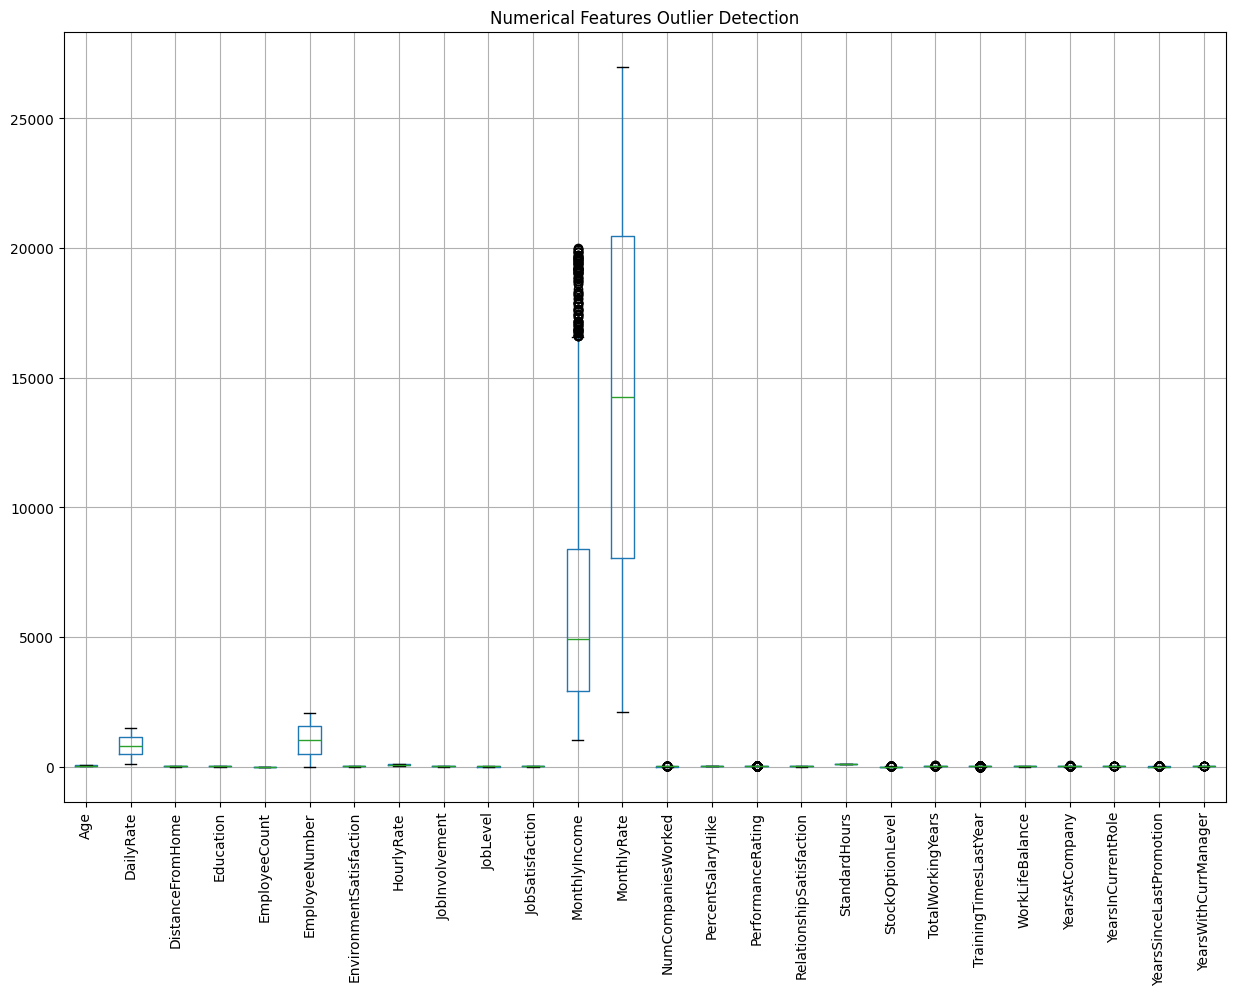

In [8]:
plt.figure(figsize=(15, 10)) 
df.select_dtypes(include=['int64', 'float64']).boxplot(rot=90) 
plt.title("Numerical Features Outlier Detection") 
plt.show()

## **VI. Exploratory Data Analysis** 

#### 1. Data Overview  

#### 2. Univariate Analysis

#### 3. Bivariate Analysis

#### 4. Multivariate Analysis

## **Reference/s** 
-   IBM HR Analytics Employee Attrition & Performance. (2017, March 31). https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data

## **By Data Alchemists** 
- Bon, Jan Louise B. 
- Brodett, Ram David M.
- Lopez, Ghee Kaye S. 
- Paguiligan, James Archer B. 
- Sanchez, Matthew Heinz O. 